### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as ms

### Loading Dataset

In [2]:
japan = pd.read_excel('Japan Earthquakes (1900-2023).xlsx')
japan.head()

,time,Date,Time,Day,Month,Year,latitude,longitude,depth,mag,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1905-06-02T05:39:39.600Z,1905-06-02,05:39:39.600000,2,6,1905,33.715,131.759,60.0,6.91,...,2022-04-25T20:23:58.797Z,"31 km SSW of Hikari, Japan",earthquake,NaN,15.4,0.53,NaN,reviewed,iscgem,iscgem
1,1905-07-06T16:20:46.930Z,1905-07-06,16:20:46.930000,6,7,1905,38.417,144.119,15.0,7.67,...,2022-04-26T00:10:30.983Z,"217 km ESE of Kamaishi, Japan",earthquake,NaN,25.0,0.20,NaN,reviewed,iscgem,iscgem
2,1906-01-21T13:49:33.570Z,1906-01-21,13:49:33.570000,21,1,1906,34.175,138.025,300.0,7.40,...,2022-04-25T20:24:35.887Z,"50 km SSW of ?yama, Japan",earthquake,NaN,25.0,0.30,NaN,reviewed,iscgem,iscgem
3,1906-02-24T00:13:40.730Z,1906-02-24,00:13:40.730000,24,2,1906,34.633,141.424,15.0,6.25,...,2022-04-25T20:36:44.935Z,"116 km ESE of Katsuura, Japan",earthquake,NaN,15.9,0.20,NaN,reviewed,iscgem,iscgem
4,1906-03-13T13:26:40.640Z,1906-03-13,13:26:40.640000,13,3,1906,32.560,132.052,30.0,6.64,...,2022-04-25T20:36:50.610Z,"36 km E of Nobeoka, Japan",earthquake,NaN,6.5,0.67,NaN,reviewed,iscgem,iscgem


# Exploratory Data Analysis

### Plotting bar chart of null values

<AxesSubplot:>

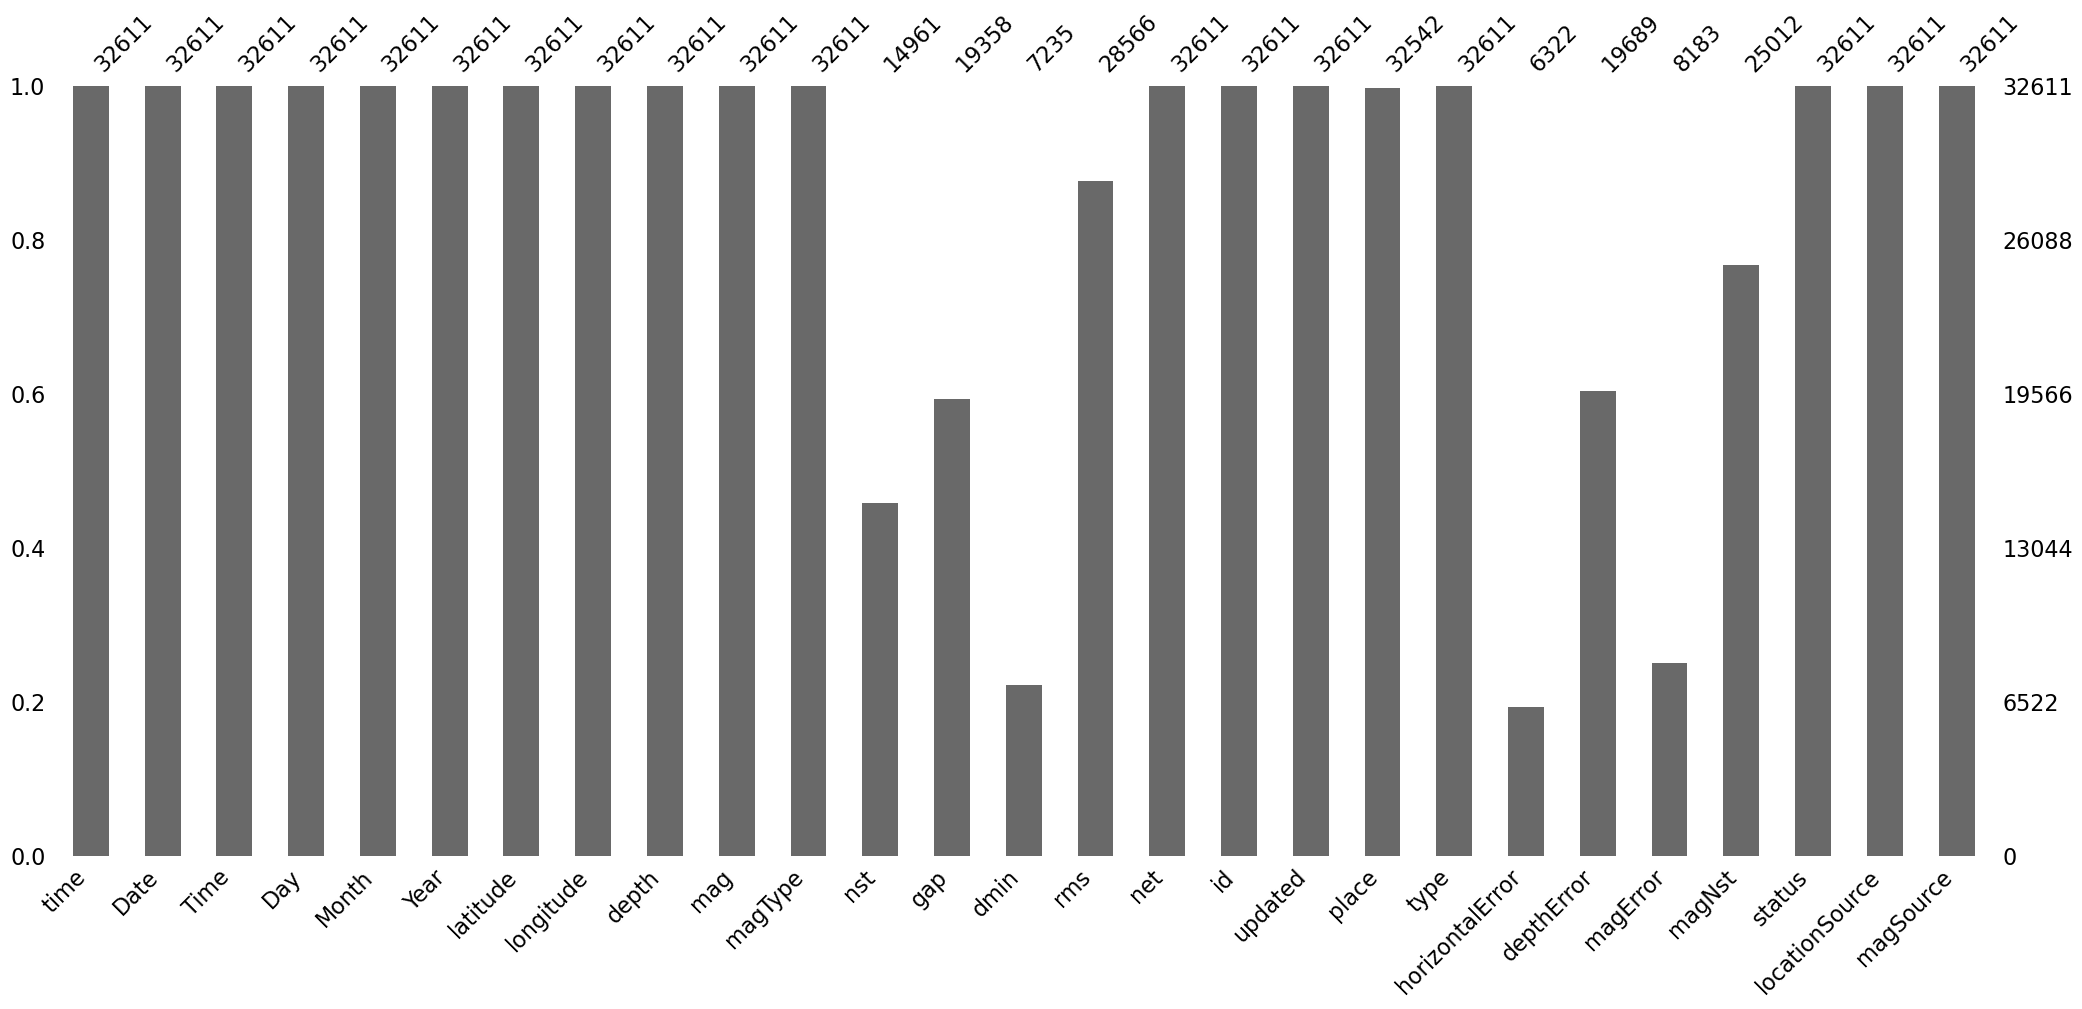

In [3]:
ms.bar(japan)

In [4]:
japan.describe()

,Day,Month,Year,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,32611.000000,32611.000000,32611.000000,32611.000000,32611.000000,32611.000000,32611.000000,14961.000000,19358.000000,7235.000000,28566.000000,6322.000000,19689.000000,8183.000000,25012.000000
mean,15.681028,6.265861,2001.745055,34.895671,139.998453,75.735328,4.560530,65.295903,119.684802,1.969795,0.888780,7.233739,8.746298,0.150811,23.963857
std,8.564147,3.346498,16.622530,3.771934,3.767547,113.572455,0.562539,90.126225,40.746729,1.176094,0.256262,2.236175,6.963569,0.106106,45.925670
min,1.000000,1.000000,1905.000000,27.391000,128.320000,0.000000,3.000000,4.000000,8.000000,0.038000,0.000000,1.400000,0.000000,0.020000,1.000000
25%,9.000000,3.000000,1994.000000,31.864500,139.227000,24.355000,4.200000,17.000000,99.200000,1.122000,0.710000,5.800000,4.600000,0.078000,3.000000
50%,15.000000,6.000000,2007.000000,35.691000,141.223000,35.000000,4.500000,31.000000,125.000000,1.880000,0.880000,7.100000,7.000000,0.125000,9.000000
75%,23.000000,9.000000,2012.000000,37.666000,142.314000,59.300000,4.800000,68.000000,136.300000,2.616000,1.050000,8.500000,11.000000,0.199000,23.000000
max,31.000000,12.000000,2023.000000,41.656000,144.843000,686.390000,9.100000,918.000000,353.400000,33.409000,1.940000,21.700000,72.700000,0.920000,941.000000


### Creating a UDF for getting total number of earthquake for particular year

### Creating a UDF for count total number of earthqukes occured above given magnitude

In [7]:
def count_mag():
  m = eval(input("Enter your magnitude: "))
  data1 = japan[japan['mag'] >= m]
  print("Number of Earthquakes of magnitude >= ",m,":",data1.shape[0])
  plt.scatter(data1['Year'],data1['mag'])
  display(data1.head())

### Plotting total number of earthquakes recorded for every year

In [8]:
def max_earthquake_year():
  data1 = japan['Year']
  min = int(data1.min())
  max = int(data1.max())
  counts = []
  for i in range(min,max+1):
    counts.append(data1.value_counts()[i])
  x = []
  for i in range(min,max+1):
    x.append(i)
  plt.plot(x,counts,'--')

### Creating a new column categorizing earthquakes based on magnitude.
### (1) 'Fatal' if magnitude >= 6
### (2) 'Moderate' if 6 > magnitude >= 4
### (3) 'Mild' if magnitude < 4

In [9]:
japan['earthquake_type'] = ['1']*len(japan['mag'])

for i in range(len(japan['mag'])):
    if japan['mag'][i] >= 6:
        japan['earthquake_type'][i] = 'Fatal'
    elif (japan['mag'][i] >= 4) & (japan['mag'][i] < 6):
        japan['earthquake_type'][i] = 'Moderate'
    elif japan['mag'][i] < 4:
        japan['earthquake_type'][i] = 'Mild'

C:\Users\nauma\AppData\Local\Temp\ipykernel_20356\1571283248.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  japan['earthquake_type'][i] = 'Fatal'
C:\Users\nauma\AppData\Local\Temp\ipykernel_20356\1571283248.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  japan['earthquake_type'][i] = 'Moderate'
C:\Users\nauma\AppData\Local\Temp\ipykernel_20356\1571283248.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  japan['earthquake_typ

In [10]:
japan.tail(20)

,time,Date,Time,Day,Month,Year,latitude,longitude,depth,mag,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,earthquake_type
32591,2023-03-22T08:23:46.525Z,2023-03-22,08:23:46.525000,22,3,2023,40.2813,142.9317,35.548,4.3,...,"110 km NE of Miyako, Japan",earthquake,8.60,5.500,0.111,23.0,reviewed,us,us,Moderate
32592,2023-03-23T18:36:42.761Z,2023-03-23,18:36:42.761000,23,3,2023,30.0109,141.8769,10.000,4.6,...,"Izu Islands, Japan region",earthquake,8.71,1.858,0.048,132.0,reviewed,us,us,Moderate
32593,2023-03-24T04:25:26.072Z,2023-03-24,04:25:26.072000,24,3,2023,29.9829,141.9136,4.574,5.4,...,"Izu Islands, Japan region",earthquake,9.93,4.233,0.089,12.0,reviewed,us,us,Moderate
32594,2023-03-24T04:32:54.658Z,2023-03-24,04:32:54.658000,24,3,2023,29.9747,141.8987,10.000,4.6,...,"Izu Islands, Japan region",earthquake,9.05,1.882,0.062,78.0,reviewed,us,us,Moderate
32595,2023-03-24T04:37:10.159Z,2023-03-24,04:37:10.159000,24,3,2023,30.0053,141.8439,10.000,4.7,...,"Izu Islands, Japan region",earthquake,10.33,1.873,0.053,107.0,reviewed,us,us,Moderate
32596,2023-03-24T04:38:09.932Z,2023-03-24,04:38:09.932000,24,3,2023,29.9640,141.8529,10.000,5.0,...,"Izu Islands, Japan region",earthquake,10.93,1.866,0.061,87.0,reviewed,us,us,Moderate
32597,2023-03-24T07:25:35.049Z,2023-03-24,07:25:35.049000,24,3,2023,36.4291,140.3217,84.661,4.7,...,"7 km NE of Kasama, Japan",earthquake,3.65,6.256,0.086,13.0,reviewed,us,us,Moderate
32598,2023-03-24T11:44:22.999Z,2023-03-24,11:44:22.999000,24,3,2023,29.9288,141.7901,10.000,4.2,...,"Izu Islands, Japan region",earthquake,6.29,1.920,0.152,12.0,reviewed,us,us,Moderate
32599,2023-03-24T12:35:42.124Z,2023-03-24,12:35:42.124000,24,3,2023,30.0185,141.9097,10.000,4.4,...,"Izu Islands, Japan region",earthquake,5.14,1.801,0.092,36.0,reviewed,us,us,Moderate
32600,2023-03-24T13:23:07.180Z,2023-03-24,13:23:07.180000,24,3,2023,29.9765,141.9049,10.000,4.2,...,"Izu Islands, Japan region",earthquake,6.59,1.875,0.132,17.0,reviewed,us,us,Moderate


### Encoding 'earthquakes_type' columns with numerical values where 2 is for Fatal, 1 for moderate and 0 for Mild

In [11]:
japan['earthquake_type'] = japan['earthquake_type'].map({'Fatal':2,'Moderate':1,'Mild':0})

In [12]:
japan.head()

,time,Date,Time,Day,Month,Year,latitude,longitude,depth,mag,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,earthquake_type
0,1905-06-02T05:39:39.600Z,1905-06-02,05:39:39.600000,2,6,1905,33.715,131.759,60.0,6.91,...,"31 km SSW of Hikari, Japan",earthquake,NaN,15.4,0.53,NaN,reviewed,iscgem,iscgem,2
1,1905-07-06T16:20:46.930Z,1905-07-06,16:20:46.930000,6,7,1905,38.417,144.119,15.0,7.67,...,"217 km ESE of Kamaishi, Japan",earthquake,NaN,25.0,0.20,NaN,reviewed,iscgem,iscgem,2
2,1906-01-21T13:49:33.570Z,1906-01-21,13:49:33.570000,21,1,1906,34.175,138.025,300.0,7.40,...,"50 km SSW of ?yama, Japan",earthquake,NaN,25.0,0.30,NaN,reviewed,iscgem,iscgem,2
3,1906-02-24T00:13:40.730Z,1906-02-24,00:13:40.730000,24,2,1906,34.633,141.424,15.0,6.25,...,"116 km ESE of Katsuura, Japan",earthquake,NaN,15.9,0.20,NaN,reviewed,iscgem,iscgem,2
4,1906-03-13T13:26:40.640Z,1906-03-13,13:26:40.640000,13,3,1906,32.560,132.052,30.0,6.64,...,"36 km E of Nobeoka, Japan",earthquake,NaN,6.5,0.67,NaN,reviewed,iscgem,iscgem,2


### Finding percentage of Fatal,moderate and mild earthquakes

In [13]:
(japan['earthquake_type'].value_counts())#/len(japan['earthquake_type']))*100

1    29078
0     2624
2      909
Name: earthquake_type, dtype: int64

### X = Independent features, 'Day','Month','Year','latitude','longitude','depth'
### y = Target feature, 'earthquake_type'

In [14]:
X = japan.iloc[:,3:9]
y = japan.iloc[:,-1]

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

### K means Clustering

In [16]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)

In [17]:
y_pred = km.fit_predict(japan.iloc[:,3:9])

In [18]:
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [19]:
km.inertia_

38647240.7906963

### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [21]:
model.fit(X_train,y_train)

C:\Users\nauma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_pred = model.predict(X_test)

In [23]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

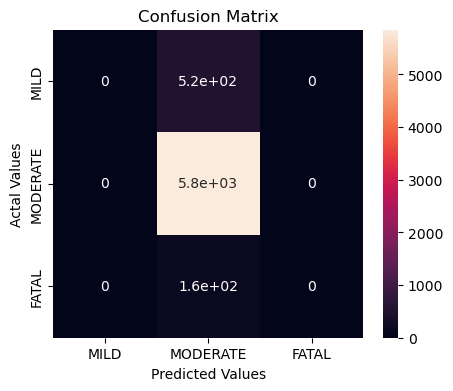

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,precision_recall_fscore_support
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['MILD','MODERATE','FATAL'], 
                     columns = ['MILD','MODERATE','FATAL'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### Finding accuracy of model

In [25]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred,y_test)
print("Accuracy: ",acc*100,"%")

prf = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precision: ",prf[0]*100,"%")
print("Recall: ",prf[1]*100,"%")
print("F1_score: ",prf[2]*100,"%")

Accuracy:  89.66733098267669 %
Precision:  29.889110327558893 %
Recall:  33.33333333333333 %
F1_score:  31.517404892768617 %


C:\Users\nauma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(n_estimators = 50, random_state = 42)

rf1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [27]:
y2_pred = rf1.predict(X_test)

In [28]:
print(y2_pred)
print(len(y2_pred))
print(sum(y2_pred))

[1 1 1 ... 1 1 1]
6523
6456


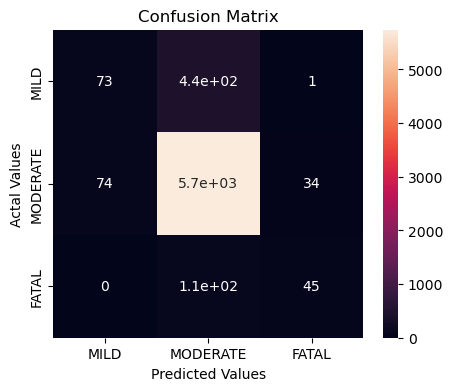

In [29]:
cm1 = confusion_matrix(y_test, y2_pred)
cm1_df = pd.DataFrame(cm1,
                     index = ['MILD','MODERATE','FATAL'], 
                     columns = ['MILD','MODERATE','FATAL'])
plt.figure(figsize=(5,4))
sns.heatmap(cm1_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [30]:
prf1 = precision_recall_fscore_support(y_test, y2_pred, average='macro')
acc1 = accuracy_score(y2_pred,y_test)
print("Accuracy: ",acc1*100,"%")
print("Precision: ",prf1[0]*100,"%")
print("Recall: ",prf1[1]*100,"%")
print("F1_score: ",prf1[2]*100,"%")

Accuracy:  89.82063467729571 %
Precision:  65.69824774467178 %
Recall:  47.03078281895173 %
F1_score:  51.54381459926376 %


In [31]:
BBox = ((japan.longitude.min(),   japan.longitude.max(),      
         japan.latitude.min(), japan.latitude.max()))
print(BBox)

(128.32, 144.843, 27.391, 41.656)


### Plotting all Fatal earthquakes on map for understanding

In [32]:
df1 = japan[japan['earthquake_type'] == 2]

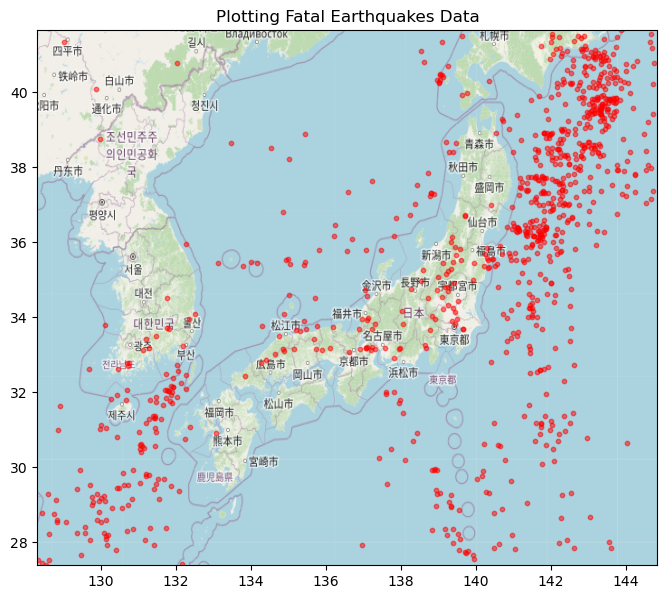

In [33]:
ruh_m = plt.imread("map.png")
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df1.longitude, df1.latitude, zorder=1, alpha= 0.5, c='red', s=10)
ax.set_title('Plotting Fatal Earthquakes Data')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

### Plotting Moderate earthquakes on map

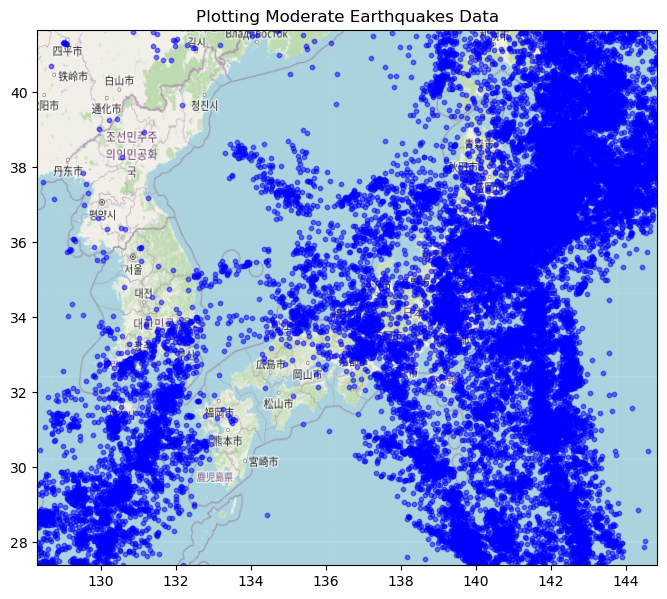

In [34]:
df2 = japan[japan['earthquake_type'] == 1]

ruh_m = plt.imread("map.png")
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df2.longitude, df2.latitude, zorder=1, alpha= 0.5, c='blue', s=10)
ax.set_title('Plotting Moderate Earthquakes Data')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

### Creating index columns, for 'earthquake_type' mild,moderate and fatal

In [35]:
idx_fatal = list(japan[japan['earthquake_type']==2].index)
idx_moderate = list(japan[japan['earthquake_type']==1].index)
idx_mild = list(japan[japan['earthquake_type']==0].index)

### Choosing random sample based on index for training dataset

In [36]:
import random
id_fatal_train = random.sample(idx_fatal,500)
id_mode_train = random.sample(idx_moderate,28000)
id_mild_train = random.sample(idx_mild,2000)

### Choosing rows which are not in training set for test data

In [37]:
id_test = []
for i in range(32611):
    if (i not in id_fatal_train) and (i not in id_mode_train) and (i not in id_mild_train):
        id_test.append(i)

In [38]:
temp = japan.iloc[id_fatal_train]
temp1 = japan.iloc[id_mode_train]
temp2 = japan.iloc[id_mild_train]
for i in range(5):
    temp4 = temp
    temp = pd.concat([temp,temp])
temp = pd.concat([temp,temp4])
temp = pd.concat([temp,temp1])
for i in range(14):
    temp = pd.concat([temp,temp2])
len(temp)

80000

In [39]:
tester = japan.iloc[id_test]

In [40]:
tester['earthquake_type'].value_counts()

1    1078
0     624
2     409
Name: earthquake_type, dtype: int64

In [41]:
temp['earthquake_type'].value_counts()

1    28000
0    28000
2    24000
Name: earthquake_type, dtype: int64

In [42]:
x_train = temp.iloc[:,3:9]
y_train = temp.iloc[:,-1]
x1_test = tester.iloc[:,3:9]
y1_test = tester.iloc[:,-1]

### Applying Logistic Regression

In [43]:
model1 = LogisticRegression(max_iter = 50000)
model1.fit(x_train,y_train)
y3_pred = model1.predict(x1_test)

In [44]:
acc = accuracy_score(y3_pred,y1_test)
acc

0.5045002368545712

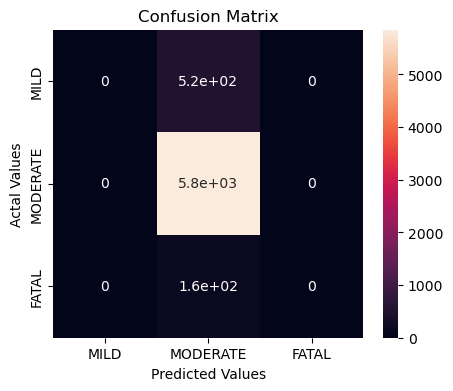

In [45]:
cm3 = confusion_matrix(y_test, y_pred)

cm3_df = pd.DataFrame(cm3,
                     index = ['MILD','MODERATE','FATAL'], 
                     columns = ['MILD','MODERATE','FATAL'])
plt.figure(figsize=(5,4))
sns.heatmap(cm3_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [46]:
prf2 = precision_recall_fscore_support(y1_test, y3_pred, average='macro')
acc2 = accuracy_score(y3_pred,y1_test)
print("Accuracy: ",acc2*100,"%")
print("Precision: ",prf2[0]*100,"%")
print("Recall: ",prf2[1]*100,"%")
print("F1_score: ",prf2[2]*100,"%")

Accuracy:  50.450023685457126 %
Precision:  47.7352193459046 %
Recall:  49.06461155369643 %
F1_score:  47.96121201390713 %


### Applying Random Forest Classifier

In [47]:
rf2 = RandomForestClassifier(n_estimators = 50, random_state = 42)

rf2.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [48]:
y_pred2 = rf2.predict(x1_test)

In [49]:
acc = accuracy_score(y_pred2,y1_test)
acc

0.5963998105163429

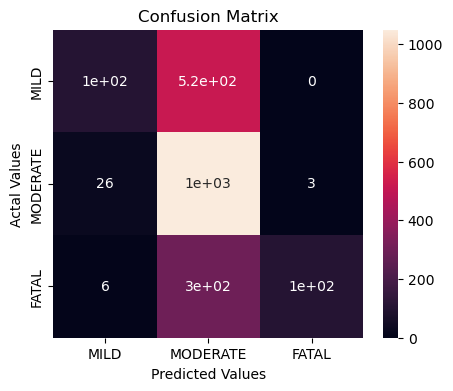

Accuracy:  59.639981051634294 %
Precision:  76.6936879612027 %
Recall:  46.60304257972787 %
F1_score:  46.49260395049528 %


In [50]:
cm4 = confusion_matrix(y1_test, y_pred2)

cm4_df = pd.DataFrame(cm4,
                     index = ['MILD','MODERATE','FATAL'], 
                     columns = ['MILD','MODERATE','FATAL'])
plt.figure(figsize=(5,4))
sns.heatmap(cm4_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

prf4 = precision_recall_fscore_support(y1_test, y_pred2, average='macro')
acc4 = accuracy_score(y_pred2,y1_test)
print("Accuracy: ",acc4*100,"%")
print("Precision: ",prf4[0]*100,"%")
print("Recall: ",prf4[1]*100,"%")
print("F1_score: ",prf4[2]*100,"%")

### Time Series Analysis

### Checking for stationarity

In [56]:
!pip install statsmodels

In [61]:
from statsmodels.tsa.stattools import adfuller
def check_data(data):
    dftest = adfuller(data,autolag = 'AIC')
    print("ADF : ",dftest[0])
    print("P-value : ",dftest[1])
    print("Number of Lags: ",dftest[2])
    print("Num of obs. used for ADF regr. and critical value calc :",dftest[3])
    print("Critical Value: ")
    for key,val in dftest[4].items():
        print("\t",key,"=",val)

In [62]:
check_data(japan['mag'])

ADF :  -7.616336364328451
P-value :  2.1868188145266062e-11
Number of Lags:  51
Num of obs. used for ADF regr. and critical value calc : 32559
Critical Value: 
	 1% = -3.4305508604573633
	 5% = -2.8616287751490717
	 10% = -2.566817252258182
